<a href="https://colab.research.google.com/github/mahmoud0alabsi/ML-projects/blob/main/Shai_Bootcamp_House_Price_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Head

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
original_training_data = pd.read_csv('/content/drive/MyDrive/AI/Shai Bootcamp/data/train.csv')

In [3]:
train_data = original_training_data.copy()

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dropCol = ['Alley' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'Id']   # 4 columns
train_data.drop(dropCol , axis = 1 , inplace = True)

In [7]:
train_data.shape

(1460, 76)

####correlation matrix

In [13]:
corr = train_data.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [14]:
corr_data = pd.DataFrame(data=corr['SalePrice'])
corr_data.reset_index(inplace = True)
corr_data['SalePrice']

0    -0.084284
1     0.351799
2     0.263843
3     0.790982
4    -0.077856
5     0.522897
6     0.507101
7     0.477493
8     0.386420
9    -0.011378
10    0.214479
11    0.613581
12    0.605852
13    0.319334
14   -0.025606
15    0.708624
16    0.227122
17   -0.016844
18    0.560664
19    0.284108
20    0.168213
21   -0.135907
22    0.533723
23    0.466929
24    0.486362
25    0.640409
26    0.623431
27    0.324413
28    0.315856
29   -0.128578
30    0.044584
31    0.111447
32    0.092404
33   -0.021190
34    0.046432
35   -0.028923
36    1.000000
Name: SalePrice, dtype: float64

In [15]:
train_data_copy = train_data.copy()

In [16]:
train_data_copy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [17]:
for i in train_data_copy.select_dtypes(include=['float64' , 'int64']).columns:
  if corr['SalePrice'][i] < 0.2:
      train_data_copy.drop(i , axis = 1 , inplace=True)

####plot

In [18]:
lest=[]
for i in train_data.select_dtypes(include=['float64' , 'int64']).columns:
  if corr['SalePrice'][i] < 0.2:
    lest.append(i)

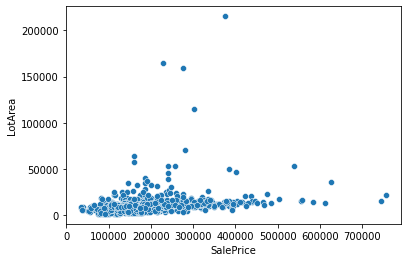

In [19]:
sns.scatterplot(x=train_data['SalePrice'] , y=train_data['LotArea'])
    #plt.legend(train_data[i])

####describe and dealing with high std

In [20]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
train_data.describe().std().sort_values(ascending=False)

SalePrice        237803.799206
LotArea           73587.370965
MiscVal            5403.042483
TotalBsmtSF        1913.048589
BsmtFinSF1         1878.276762
GrLivArea          1658.566019
1stFlrSF           1384.720924
2ndFlrSF            762.135346
BsmtUnfSF           760.957911
YrSold              708.230685
YearRemodAdd        693.050776
GarageYrBlt         691.216417
YearBuilt           682.491640
MasVnrArea          676.729227
BsmtFinSF2          665.319415
PoolArea            541.181438
GarageArea          536.717113
WoodDeckSF          535.125950
LowQualFinSF        523.315526
EnclosedPorch       519.870181
3SsnPorch           519.638831
BsmtHalfBath        516.072428
HalfBath            515.992138
BsmtFullBath        515.939191
Fireplaces          515.872748
KitchenAbvGr        515.821691
FullBath            515.677866
GarageCars          515.607733
ScreenPorch         515.462608
BedroomAbvGr        515.199330
OverallCond         514.543568
OverallQual         514.353644
MoSold  

In [22]:
train_data.loc[train_data[lest[3]] > 80].count()[lest[3]]

22

In [23]:
train_data.drop(train_data.loc[train_data[lest[3]] > 80].index , inplace=True)

In [24]:
train_data.loc[train_data[lest[4]] > 1.25].count()[lest[4]]

2

In [25]:
train_data.drop(train_data.loc[train_data[lest[4]] > 80].index , inplace=True)

In [26]:
train_data.loc[train_data[lest[6]] > 2].count()[lest[6]]

2

In [27]:
train_data.drop(train_data.loc[train_data[lest[6]] > 2].index , inplace=True)

In [28]:
train_data.loc[train_data[lest[7]] > 320].count()[lest[7]]

2

In [29]:
train_data.drop(train_data.loc[train_data[lest[7]] > 320].index , inplace=True)

In [30]:
train_data.loc[train_data[lest[8]] > 200].count()[lest[8]]

9

In [31]:
train_data.drop(train_data.loc[train_data[lest[8]] > 200].index , inplace=True)

In [32]:
train_data[train_data['LotArea'] > 13000].count()['LotArea']

225

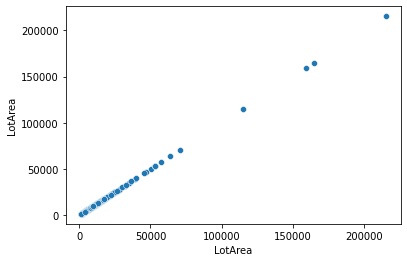

In [33]:
sns.scatterplot(x = train_data['LotArea'] , y=train_data['LotArea'])

In [34]:
train_data.loc[train_data['LotArea'] > 25000].count()['LotArea']

30

In [35]:
train_data.drop(train_data.loc[train_data['LotArea'] > 25000].index , inplace=True)

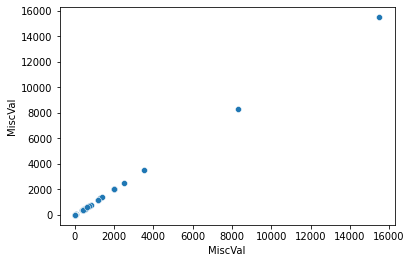

In [36]:
sns.scatterplot(x = train_data['MiscVal'] , y=train_data['MiscVal'])

In [37]:
train_data.loc[train_data['MiscVal'] > 4000].count()['MiscVal']

2

In [38]:
train_data.drop(train_data.loc[train_data['MiscVal'] > 4000].index , inplace=True)

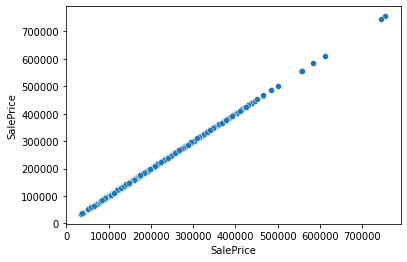

In [39]:
sns.scatterplot(x = train_data['SalePrice'] , y=train_data['SalePrice'])

In [40]:
train_data.loc[train_data['SalePrice'] > 500000].count()['SalePrice']

7

In [41]:
train_data.drop(train_data.loc[train_data['SalePrice'] > 500000].index , inplace=True)

In [42]:
train_data.shape

(1386, 76)

In [43]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1386.000000,1146.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1379.000000,1386.000000,1386.000000,...,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,56.919192,69.037522,9485.253968,6.082251,5.568543,1972.076479,1984.866522,101.141407,428.803030,45.087302,...,91.771284,45.958153,21.266955,1.510823,14.634921,1.790043,26.546898,6.335498,2007.814574,177487.206349
std,42.173314,21.464409,3606.033781,1.357058,1.103322,29.697876,20.657536,173.120748,421.282972,158.264364,...,120.773627,65.242948,58.631599,15.566750,54.661461,33.574572,190.021753,2.689597,1.330385,71175.727529
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9345.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,378.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161875.000000
75%,70.000000,80.000000,11316.750000,7.000000,6.000000,2001.000000,2004.000000,164.500000,700.000000,0.000000,...,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,211750.000000
max,190.000000,182.000000,25000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,1880.000000,1474.000000,...,736.000000,547.000000,318.000000,196.000000,480.000000,738.000000,3500.000000,12.000000,2010.000000,485000.000000


In [44]:
train_data.loc[train_data[lest[9]] > 300].count()[lest[9]]

7

In [45]:
train_data.drop(train_data.loc[train_data[lest[9]] > 300].index , inplace=True)

In [46]:
train_data.loc[train_data[lest[11]] > 1200].count()[lest[11]]

7

In [47]:
train_data.drop(train_data.loc[train_data[lest[11]] > 1200].index , inplace=True)

In [48]:
train_data.loc[train_data[lest[10]] > 100].count()[lest[10]]

3

In [49]:
train_data.drop(train_data.loc[train_data[lest[10]] > 100].index , inplace=True)

In [50]:
train_data.loc[train_data[lest[6]] < 0.25].count()[lest[6]]

1

In [51]:
train_data.drop(train_data.loc[train_data[lest[6]] <0.25].index , inplace=True)

In [52]:
train_data.describe().std()

MSSubClass          464.143729
LotFrontage         377.861021
LotArea            7647.378024
OverallQual         481.829346
OverallCond         482.018381
YearBuilt           687.576677
YearRemodAdd        697.842305
MasVnrArea          658.470286
BsmtFinSF1          660.336229
BsmtFinSF2          645.152742
BsmtUnfSF           749.851781
TotalBsmtSF         951.117108
1stFlrSF            905.760227
2ndFlrSF            683.050421
LowQualFinSF        480.211543
GrLivArea           968.756006
BsmtFullBath        483.413084
BsmtHalfBath        483.546080
FullBath            483.152107
HalfBath            483.465173
BedroomAbvGr        482.773456
KitchenAbvGr        483.295044
TotRmsAbvGrd        481.652325
Fireplaces          483.347938
GarageYrBlt         696.521838
GarageCars          483.081718
GarageArea          511.960225
WoodDeckSF          491.805941
OpenPorchSF         479.541027
EnclosedPorch       476.070145
3SsnPorch           477.727386
ScreenPorch         476.483722
PoolArea

####Split data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)

In [55]:
train_set.shape

(1094, 76)

In [56]:
test_set.shape

(274, 76)

In [57]:
#split train set
x_train = train_set.drop('SalePrice' , axis=1).copy()  #predictors
y_train = train_set['SalePrice'].copy()      # labels

#split test set
x_test = test_set.drop('SalePrice' , axis=1).copy()   #predictors
y_test = test_set['SalePrice'].copy()        # labels

####EDA

#####Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
def encoding(x):
  for col in x.select_dtypes(include=['object']).columns:
    x[col] = encoder.fit_transform(np.array(x[col]).reshape(-1,1))
    
  return x

In [60]:
x_train = encoding(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
x_train = pd.DataFrame(data=x_train)

In [62]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
261,60,3,69.0,9588,1,0,3,0,4,0,...,148,0,0,0,0,0,11,2007,6,5
891,60,3,70.0,11184,1,3,3,0,4,0,...,0,0,0,0,0,0,7,2009,8,4
684,60,3,58.0,16770,1,1,3,0,1,0,...,81,0,0,0,0,0,6,2010,8,4
793,20,3,76.0,9158,1,3,3,0,4,0,...,130,0,0,0,0,0,6,2007,6,5
1408,70,4,60.0,7740,1,3,3,0,4,0,...,0,0,0,168,0,0,6,2010,8,4


#####Fill missing values

In [63]:
x_train.select_dtypes(include=['float64' , 'int64']).columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [64]:
x_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [65]:
from sklearn.impute import SimpleImputer

imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')

def imputer(x):
  for i in x.select_dtypes(include=['float64' , 'int64']).columns:
    x[i] = imp1.fit_transform(np.array(x[i]).reshape(-1,1))

  for i in x.select_dtypes(include=['object']).columns:
    x[i] = imp2.fit_transform(np.array(x[i]).reshape(-1,1))

  return x

In [66]:
x_train.shape

(1094, 75)

In [67]:
x_train = imputer(x_train)

In [68]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
261,60.0,3.0,69.0,9588.0,1.0,0.0,3.0,0.0,4.0,0.0,...,148.0,0.0,0.0,0.0,0.0,0.0,11.0,2007.0,6.0,5.0
891,60.0,3.0,70.0,11184.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,8.0,4.0
684,60.0,3.0,58.0,16770.0,1.0,1.0,3.0,0.0,1.0,0.0,...,81.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,8.0,4.0
793,20.0,3.0,76.0,9158.0,1.0,3.0,3.0,0.0,4.0,0.0,...,130.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,6.0,5.0
1408,70.0,4.0,60.0,7740.0,1.0,3.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,168.0,0.0,0.0,6.0,2010.0,8.0,4.0


In [69]:
x_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

##### StandardScalar

In [70]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [71]:
def scaling(x):
  x = scalar.fit_transform(x)
  x = pd.DataFrame(data=x)
  return x

In [72]:
x_train = scaling(x_train)

In [73]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.061817,-0.023945,-0.006130,0.039168,0.052438,-1.400279,0.289318,-0.030248,0.593090,-0.204912,...,1.560852,-0.361855,-0.100271,-0.268558,0.0,-0.154272,1.724864,-0.592608,-0.946867,1.127569
1,0.061817,-0.023945,0.043179,0.471638,0.052438,0.733294,0.289318,-0.030248,0.593090,-0.204912,...,-0.721112,-0.361855,-0.100271,-0.268558,0.0,-0.154272,0.250644,0.920374,0.315622,0.200777
2,0.061817,-0.023945,-0.548527,1.985284,0.052438,-0.689088,0.289318,-0.030248,-1.264278,-0.204912,...,0.527801,-0.361855,-0.100271,-0.268558,0.0,-0.154272,-0.117911,1.676865,0.315622,0.200777
3,-0.880735,-0.023945,0.339032,-0.077350,0.052438,0.733294,0.289318,-0.030248,0.593090,-0.204912,...,1.283316,-0.361855,-0.100271,-0.268558,0.0,-0.154272,-0.117911,-0.592608,-0.946867,1.127569
4,0.297456,1.516984,-0.449910,-0.461588,0.052438,0.733294,0.289318,-0.030248,0.593090,-0.204912,...,-0.721112,-0.361855,-0.100271,3.346945,0.0,-0.154272,-0.117911,1.676865,0.315622,0.200777


#### Train models

#####Linear Reg

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse

21332.606712890567

In [76]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(lin_reg, x_train, y_train, cv=3, scoring="neg_mean_squared_error") 
np.sqrt(-cross_val)

array([7.58469961e+14, 2.37597525e+04, 2.57959915e+04])

#####Decision Tree

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [78]:
housing_predictions = tree_reg.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse

7034.02905346047

In [79]:
cross_val = cross_val_score(tree_reg, x_train, y_train, cv=3) 
cross_val        #[0.53918817, 0.72110637, 0.74906345]

array([0.75185047, 0.77385999, 0.67972228])

#####Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=120, random_state=42, min_samples_split = 2 , min_samples_leaf = 1 , bootstrap = True
                                   , warm_start = True , max_features=25)

forest_reg.fit(x_train, y_train)

RandomForestRegressor(max_features=25, n_estimators=120, random_state=42,
                      warm_start=True)

In [81]:
housing_predictions = forest_reg.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse    #9981.327096876308  #9962.245946759662

8881.420491153565

In [82]:
cross_val = cross_val_score(forest_reg, x_train, y_train, cv=3) 
cross_val        #[0.8629223 , 0.8735437 , 0.85150339]  #[0.8668587 , 0.87167434, 0.85525699]

array([0.90949722, 0.88183237, 0.85386045])

In [83]:
q = forest_reg.feature_importances_.argsort()
q

array([69,  7, 43, 12, 70,  4, 37, 67, 62, 20, 40, 46, 34, 33, 26, 68, 29,
       66, 61, 11, 63, 53,  9,  8, 50, 23, 13,  6, 27, 19, 38,  5, 14, 73,
       21, 30, 72, 45, 74,  1, 31, 22, 39,  0, 48, 49, 71, 64, 52, 65, 10,
       16, 35, 54, 56, 55,  2, 24, 58, 18, 47, 51,  3, 42, 57, 32, 28, 41,
       60, 36, 59, 25, 17, 44, 15])

In [84]:
forest = RandomForestRegressor(n_estimators=120, random_state=2, min_samples_split = 2 , min_samples_leaf = 1 , bootstrap = True
                                   , warm_start = True, max_features=26)

forest.fit(x_train, y_train)

RandomForestRegressor(max_features=26, n_estimators=120, random_state=2,
                      warm_start=True)

In [85]:
housing_predictions = forest.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse    #9981.327096876308  #9962.245946759662

8653.734085793722

In [86]:
forest3 = RandomForestRegressor(n_estimators=120, random_state=5, min_samples_split = 2 , min_samples_leaf = 1 , bootstrap = True
                                   , warm_start = True , max_features= 27)

forest3.fit(x_train, y_train)

RandomForestRegressor(max_features=27, n_estimators=120, random_state=5,
                      warm_start=True)

In [87]:
housing_predictions = forest3.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse    #9981.327096876308  #9962.245946759662

8746.639294438786

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [80, 90, 100], 'max_features': [5 , 10 , 20 , 35]},
    {'bootstrap': [True], 'n_estimators': [85 , 100 , 120], 'max_features': [14 , 25 , 40 , 60]},
  ]

forest4 = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest4, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [5, 10, 20, 35],
                          'n_estimators': [80, 90, 100]},
                         {'bootstrap': [True], 'max_features': [14, 25, 40, 60],
                          'n_estimators': [85, 100, 120]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 40, 'n_estimators': 120}

#####GradientBoostingRegressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = GradientBoostingRegressor(random_state = 42,  learning_rate =0.1, subsample=0.8,
                         max_depth = 5)
gbr_reg.fit(x_train , y_train)

GradientBoostingRegressor(max_depth=5, random_state=42, subsample=0.8)

In [91]:
housing_predictions = gbr_reg.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse    #6232.755004749159   #6129.560042140483

5452.779006982796

In [92]:
cross_val = cross_val_score(gbr_reg, x_train, y_train, cv=3)
cross_val    #[0.87635415, 0.87672434, 0.88582702]  #[0.88494858, 0.87508431, 0.87963503]

array([0.90884981, 0.88894412, 0.86815594])

#####XGBoost

In [93]:
from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor(random_state = 42, n_jobs=5, learning_rate =0.1, subsample=0.8,
                         max_depth = 5, min_child_weight = 1, gamma = 0, scale_pos_weight = 1 )
xgb_reg.fit(x_train , y_train)

[19:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_jobs=5, random_state=42, subsample=0.8)

In [94]:
housing_predictions = xgb_reg.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse   #7064.599573301355

6229.857482636878

In [95]:
cross_val = cross_val_score(xgb_reg, x_train, y_train, cv=3)
cross_val      #[0.88085222, 0.88612183, 0.87427887]

[19:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.92738647, 0.90697529, 0.87451361])

#####Ensemble

In [96]:
from sklearn.linear_model import GammaRegressor
gamma = GammaRegressor(max_iter=100, tol=0.001)
gamma.fit(x_train , y_train)

GammaRegressor(tol=0.001)

In [97]:
housing_predictions = gamma.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse   

22542.283526865063

In [98]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import GammaRegressor

estimators = [
     ('gbr', gbr_reg),
     ('XGBRegressor' , xgb_reg),
     ('gamma' , gamma),
      ('forest' , forest_reg),
      
      ('fo' , forest)]

ensemble = StackingRegressor(estimators=estimators,final_estimator=gbr_reg)

In [99]:
ensemble.fit(x_train, y_train)

[19:23:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(max_depth=5,
                                                         random_state=42,
                                                         subsample=0.8)),
                              ('XGBRegressor',
                               XGBRegressor(max_depth=5, n_jobs=5,
                                            random_state=42, subsample=0.8)),
                              ('gamma', GammaRegressor(tol=0.001)),
                              ('forest',
                               RandomForestRegressor(max_features=25,
                                                     n_estimators=120,
                                                     random_state=42,
                                                     warm_start=True)),
                              ('fo',
                               RandomForestRegressor(max_features=26,
                                                     

In [100]:
housing_predictions = ensemble.predict(x_train)
lin_rmse = mean_squared_error(y_train, housing_predictions, squared=False)
lin_rmse           #20326.31997303931   #18107.8248626638

15660.060237233574

In [101]:
cross_val = cross_val_score(ensemble, x_train, y_train, cv=3)   #[0.89321774, 0.86028532, 0.88322617] #[0.88258806, 0.89980325, 0.89062191]
cross_val       #[0.88452941, 0.89868115, 0.88348097]     #

[19:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([0.9169052 , 0.89261352, 0.89218447])

In [102]:
ensemble.score(x_train, y_train)    #0.9205728308697275    #0.9361989260597893

0.9508123585203799

####LazyRegressor

In [105]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

  5%|▍         | 2/42 [00:00<00:09,  4.10it/s]

AdaBoostRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
BaggingRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 10%|▉         | 4/42 [00:00<00:05,  6.63it/s]

BayesianRidge model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
DecisionTreeRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 14%|█▍        | 6/42 [00:00<00:03,  9.31it/s]

DummyRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
ElasticNet model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 19%|█▉        | 8/42 [00:01<00:04,  7.23it/s]

ElasticNetCV model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
ExtraTreeRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 21%|██▏       | 9/42 [00:02<00:15,  2.14it/s]

ExtraTreesRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
GammaRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 26%|██▌       | 11/42 [00:03<00:12,  2.49it/s]

GaussianProcessRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 29%|██▊       | 12/42 [00:04<00:16,  1.80it/s]

GradientBoostingRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 33%|███▎      | 14/42 [00:08<00:30,  1.08s/it]

HistGradientBoostingRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
HuberRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
KNeighborsRegressor model failed to execute

 38%|███▊      | 16/42 [00:09<00:17,  1.47it/s]


Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
KernelRidge model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
Lars model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 43%|████▎     | 18/42 [00:09<00:12,  1.93it/s]

LarsCV model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
Lasso model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 50%|█████     | 21/42 [00:10<00:07,  2.70it/s]

LassoCV model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
LassoLars model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 55%|█████▍    | 23/42 [00:10<00:06,  3.15it/s]

LassoLarsCV model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
LassoLarsIC model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 60%|█████▉    | 25/42 [00:10<00:03,  4.60it/s]

LinearRegression model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
LinearSVR model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 62%|██████▏   | 26/42 [00:17<00:25,  1.61s/it]

MLPRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 69%|██████▉   | 29/42 [00:17<00:10,  1.27it/s]

NuSVR model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
OrthogonalMatchingPursuit model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
OrthogonalMatchingPursuitCV model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 74%|███████▍  | 31/42 [00:18<00:06,  1.63it/s]

PassiveAggressiveRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
PoissonRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 76%|███████▌  | 32/42 [01:26<03:01, 18.11s/it]

QuantileRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 79%|███████▊  | 33/42 [01:27<02:00, 13.37s/it]

RANSACRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 88%|████████▊ | 37/42 [01:29<00:23,  4.65s/it]

RandomForestRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
Ridge model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
RidgeCV model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
SGDRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


 90%|█████████ | 38/42 [01:29<00:14,  3.72s/it]

SVR model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
TransformedTargetRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
TweedieRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'
[19:26:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 98%|█████████▊| 41/42 [01:29<00:02,  2.04s/it]

XGBRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


100%|██████████| 42/42 [01:30<00:00,  2.14s/it]

LGBMRegressor model failed to execute
Cannot use mean strategy with non-numeric data:
could not convert string to float: 'RL'


In [107]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


####Test models

In [108]:
def encodingT(x):
  for col in x.select_dtypes(include=['object']).columns:
    x[col] = encoder.fit_transform(np.array(x[col]).reshape(-1,1))
    
  return x

In [109]:
def imputerT(x):
  for i in x.select_dtypes(include=['float64' , 'int64']).columns:
    x[i] = imp1.transform(np.array(x[i]).reshape(-1,1))

  for i in x.select_dtypes(include=['object']).columns:
    x[i] = imp2.transform(np.array(x[i]).reshape(-1,1))

  return x

In [110]:
def scalingT(x):
  x = scalar.transform(x)
  x = pd.DataFrame(data=x)
  return x

In [111]:
x_test = encoding(x_test)

In [112]:
x_test = imputer(x_test)

In [113]:
x_test = scaling(x_test)

In [114]:
housing_predictions = ensemble.predict(x_test)
lin_rmse = mean_squared_error(y_test, housing_predictions, squared=False)  #20919.018436799324
lin_rmse           #21876.62325064199   #22761.531468983  #22338.133193221    # with transorm #22338.133193221 #without 21876.62325064199

19566.023155951178

In [115]:
cross_val = cross_val_score(ensemble, x_test, y_test, cv=3)#[0.8467194 , 0.85887058, 0.84750848]
cross_val        #[0.85148432, 0.86254551, 0.85121953]  #[0.84062874, 0.85832174, 0.82729018] #Transorm [0.84062874, 0.85832174, 0.82729018]
                                                                                             #withoout [0.85148432, 0.86254551, 0.85121953]

[19:26:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:26:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([0.84311796, 0.86591249, 0.90879644])

In [116]:
gbr_reg.score(x_test,y_test)    #0.9028902155278541   #0.8987497353129185

0.9317515741068763

####Submitions data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI/Shai Bootcamp/data/test.csv')

In [ ]:
sub_temp = pd.read_csv('/content/drive/MyDrive/AI/Shai Bootcamp/data/sample_submission.csv')

In [ ]:
data.head()

In [ ]:
sub_temp.head()

In [ ]:
data.drop(dropCol , axis = 1 , inplace = True)

In [ ]:
data.info()

In [ ]:
data = encoding(data)

In [ ]:
data = imputer(data)

In [ ]:
data = scaling(data)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
final_answer = ensemble.predict(data)

In [ ]:
final_answer.shape

In [ ]:
sub_temp['SalePrice'] = final_answer

In [ ]:
sub_temp.head()

In [ ]:
sub_temp.shape

In [ ]:
sub_temp.to_csv('/content/drive/MyDrive/AI/Shai Bootcamp/Anwers/4.csv' , index = False)